# Recommendation Engine

In [1]:
import pandas as pd
import re

In [2]:
user_ratings_df = pd.read_csv('user_ratings.csv')

In [3]:
def clean_title(x):
    return re.sub(r'\([0-9].*\)', '',x).strip()

In [4]:
user_ratings_df['title'] = user_ratings_df['title'].apply(clean_title)
user_ratings_df['title']

0                         Toy Story
1                         Toy Story
2                         Toy Story
3                         Toy Story
4                         Toy Story
                    ...            
100831                    Bloodmoon
100832    Sympathy for the Underdog
100833                       Hazard
100834                  Blair Witch
100835                           31
Name: title, Length: 100836, dtype: object

## Non-Personalized Recommendations

### Popular Recommendations

+ One of the most basic ways to make recommendations is to go with the knowledge of the crowd and recommend what is already the most popular. 
+ So we will calculate how often each movie in the dataset has been watched and find the most frequently watched movies.

In [5]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()
movie_popularity

Forrest Gump                 329
Shawshank Redemption, The    317
Pulp Fiction                 307
Silence of the Lambs, The    279
Matrix, The                  278
                            ... 
Crossfire                      1
Evelyn                         1
Case 39                        1
Broken English                 1
Last Song, The                 1
Name: title, Length: 9446, dtype: int64

In [6]:
# Inspect the most common values
print(movie_popularity.head().index)

Index(['Forrest Gump', 'Shawshank Redemption, The', 'Pulp Fiction',
       'Silence of the Lambs, The', 'Matrix, The'],
      dtype='object')


+ Just because a movie has been watched by a lot of people doesn't necessarily mean viewers enjoyed it. 
+ To understand how a viewer actually felt about a movie,we check the ratings 

In [7]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="rating", ascending=False)

# Get the top movies
print(sorted_average_ratings.head())

                                            rating
title                                             
Passenger, The (Professione: reporter)         5.0
True Stories                                   5.0
In the Realm of the Senses (Ai no corrida)     5.0
Travels of an Ant                              5.0
Presto                                         5.0


+ Combine the two previous methods to find the average rating only for movies that have been reviewed more than 50 times.



In [8]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

print(popular_movies)

Index(['Forrest Gump', 'Shawshank Redemption, The', 'Pulp Fiction',
       'Silence of the Lambs, The', 'Matrix, The',
       'Star Wars: Episode IV - A New Hope', 'Jurassic Park', 'Braveheart',
       'Terminator 2: Judgment Day', 'Schindler's List',
       ...
       'Knocked Up', 'Million Dollar Baby', 'Chocolat', 'Army of Darkness',
       'Bad Boys', 'Training Day', 'Splash', 'The Devil's Advocate', 'Blow',
       'Mulholland Drive'],
      dtype='object', length=444)


In [9]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings = user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Get the movies watched over 50 times
print(popular_movies_rankings)

        userId  movieId  rating   timestamp                  title  \
0            1        1     4.0   964982703              Toy Story   
1            5        1     4.0   847434962              Toy Story   
2            7        1     4.5  1106635946              Toy Story   
3           15        1     2.5  1510577970              Toy Story   
4           17        1     4.5  1305696483              Toy Story   
...        ...      ...     ...         ...                    ...   
98559      605    26152     3.0  1277097257                 Batman   
98560      606    26152     3.5  1171361707                 Batman   
99783      550   167296     0.5  1488728333               Iron Man   
100585     606     5990     3.5  1171361986              Pinocchio   
100622     606    25946     3.5  1209233898  Three Musketeers, The   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy

In [10]:
# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The                           4.429022
Godfather, The                                      4.289062
Fight Club                                          4.272936
Cool Hand Luke                                      4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


### Method 2 - Commonly seen together

In [11]:
from itertools import permutations

In [12]:
# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

In [13]:
# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs)
print(movie_combinations)

                  movie_a                    movie_b
userId                                              
1      0        Toy Story           Grumpier Old Men
       1        Toy Story                       Heat
       2        Toy Story       Seven (a.k.a. Se7en)
       3        Toy Story        Usual Suspects, The
       4        Toy Story        From Dusk Till Dawn
...                   ...                        ...
610    1693897         31                 Gen-X Cops
       1693898         31                  Bloodmoon
       1693899         31  Sympathy for the Underdog
       1693900         31                     Hazard
       1693901         31                Blair Witch

[60793300 rows x 2 columns]


In [14]:
movie_pairs = movie_combinations.reset_index(drop=True)
print(movie_pairs)

            movie_a                    movie_b
0         Toy Story           Grumpier Old Men
1         Toy Story                       Heat
2         Toy Story       Seven (a.k.a. Se7en)
3         Toy Story        Usual Suspects, The
4         Toy Story        From Dusk Till Dawn
...             ...                        ...
60793295         31                 Gen-X Cops
60793296         31                  Bloodmoon
60793297         31  Sympathy for the Underdog
60793298         31                     Hazard
60793299         31                Blair Witch

[60793300 rows x 2 columns]


In [21]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_pairs.groupby(['movie_a', 'movie_b']).size()

# Inspect the results
print(combination_counts.head())

movie_a  movie_b                             
         '71                                     1
         'burbs, The                             3
         *batteries not included                 3
         00 Schneider - Jagd auf Nihil Baxter    1
         10                                      1
dtype: int64


In [16]:
# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head())

  movie_a                               movie_b  size
0                                           '71     1
1                                   'burbs, The     3
2                       *batteries not included     3
3          00 Schneider - Jagd auf Nihil Baxter     1
4                                            10     1


+ Now we can make our first recommendations
+ While we are not taking in any information about the person watching, and do not even know any details about the movie, valuable recommendations can still be made by examining what groups of movies are watched by the same people. 
+ For example, we will examine the movies often watched by the same people that watched Thor, and then use this data to give a recommendation to someone who just watched the movie. 

In [17]:
import matplotlib.pyplot as plt
import re

In [18]:
# Sort the counts from highest to lowest
sorted_counts_df = combination_counts_df.sort_values('size', ascending=False)


# Find the movies most frequently watched by people who watched Thor
thor_df = sorted_counts_df[sorted_counts_df['movie_a'] == 'Thor']

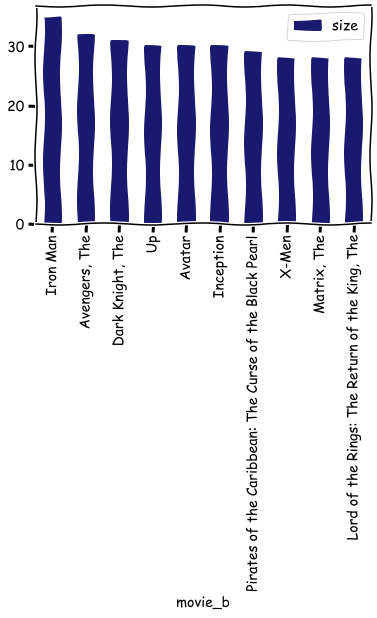

In [19]:
# Plot the results
with plt.xkcd():
    thor_df.head(10).plot.bar(x="movie_b",color='midnightblue')
    plt.show()